In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
dff = df[df.columns[3:5]] 
dff

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(dff)
    wcss.append(km.inertia_)

In [24]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 82443.04256024679,
 44454.47647967974,
 37455.98455516028,
 35252.222847201105,
 27711.04963371869,
 23285.140567765568,
 19646.482018947238]

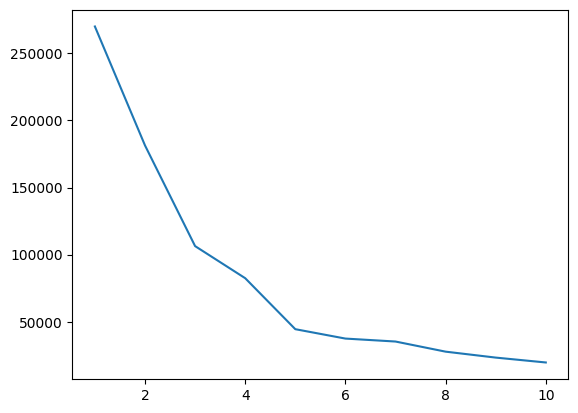

In [25]:
plt.plot(range(1,11),wcss)

In [33]:
x = dff.iloc[:,:].values

In [34]:
km = KMeans(n_clusters=5)
y_mean = km.fit_predict(x)

In [43]:
x[y_mean==4,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

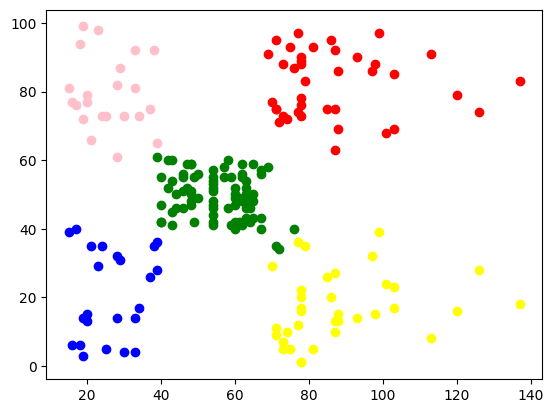

In [46]:
plt.scatter(x[y_mean == 0,0],x[y_mean==0,1],color='red')
plt.scatter(x[y_mean == 1,0],x[y_mean==1,1],color='blue')
plt.scatter(x[y_mean == 2,0],x[y_mean==2,1],color='green')
plt.scatter(x[y_mean == 3,0],x[y_mean==3,1],color='yellow')
plt.scatter(x[y_mean == 4,0],x[y_mean==4,1],color='pink')

In [47]:
dfff = df[df.columns[2:5]] 
dfff

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [50]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(dfff)


In [59]:
dfff['labels']=y_pred

C:\Users\Jeet Patel\AppData\Local\Temp\ipykernel_55472\697505366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
dfff

,Age,Annual Income (k$),Spending Score (1-100),labels
0,19,15,39,4
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


In [61]:
fig = px.scatter_3d(dfff,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color='labels')
fig.show()